In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBRFClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [27]:
data=pd.read_excel('../Phase_3_data/Worksheet in Case Study question 2.xlsx')

In [28]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [29]:
data.shape

(1000, 39)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [31]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [32]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

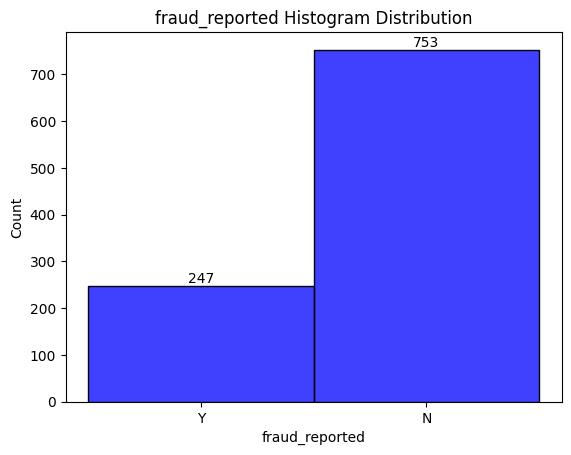

In [33]:
ax = sns.histplot(x=data['fraud_reported'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('fraud_reported')
plt.title('fraud_reported Histogram Distribution')
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

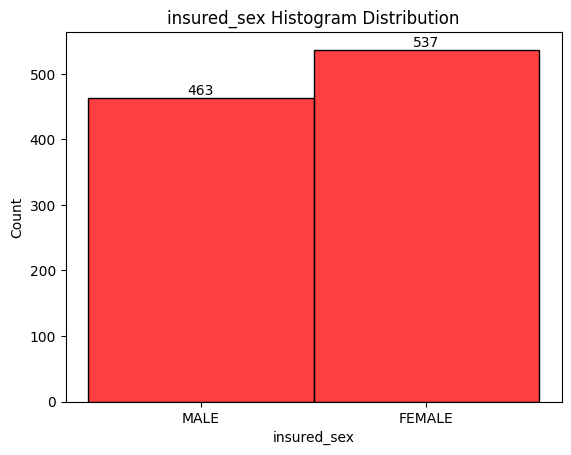

In [35]:
ax = sns.histplot(x=data['insured_sex'], color='red')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('insured_sex')
plt.title('insured_sex Histogram Distribution')
plt.show()




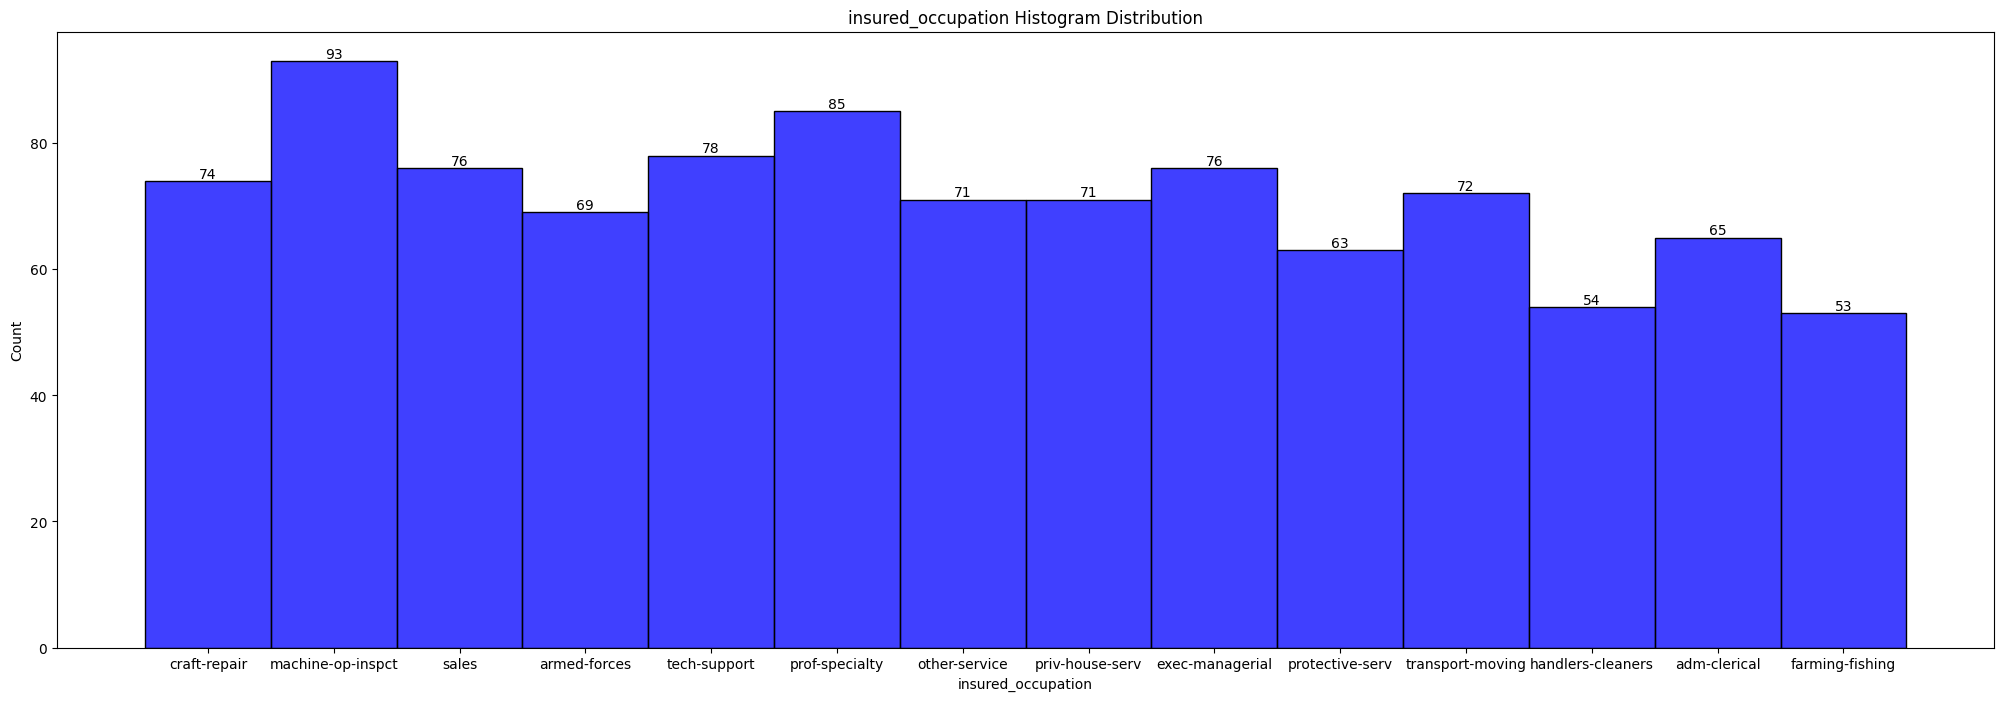

In [36]:
plt.figure(figsize=(25,8))
ax = sns.histplot(x=data['insured_occupation'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('insured_occupation')
plt.title('insured_occupation Histogram Distribution')
plt.show()


<Figure size 2500x600 with 0 Axes>

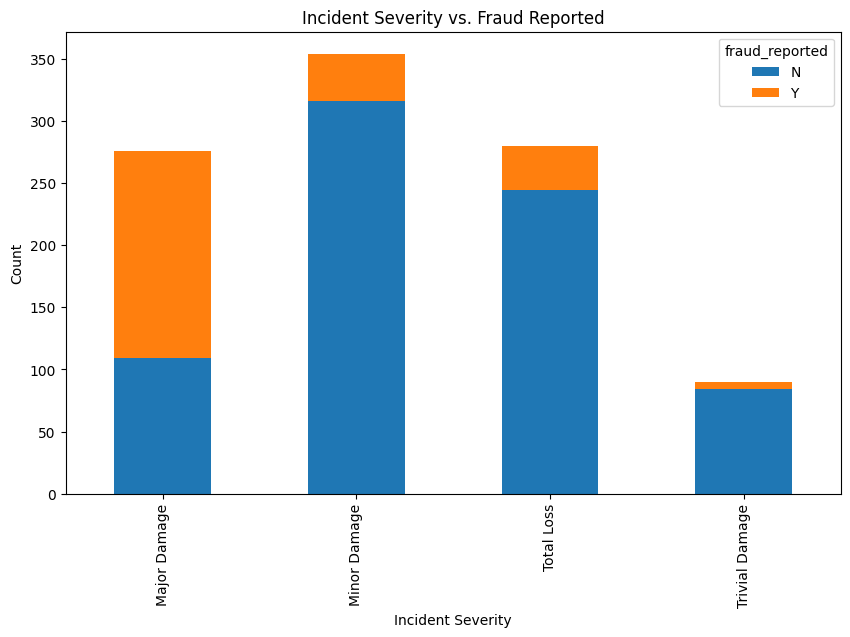

In [37]:
plt.figure(figsize=(25,6))
crosstab = pd.crosstab(data['incident_severity'], data['fraud_reported'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Incident Severity vs. Fraud Reported')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.show()

<Figure size 2500x600 with 0 Axes>

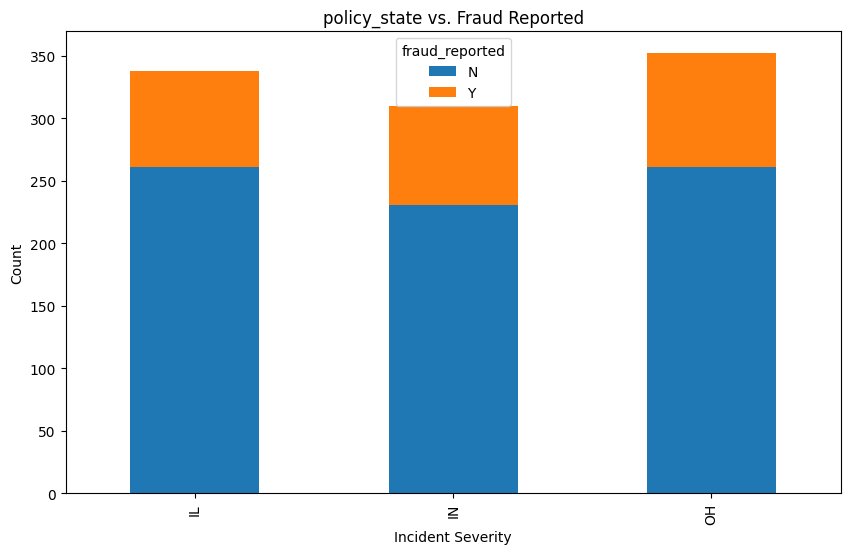

In [38]:
plt.figure(figsize=(25,6))
crosstab = pd.crosstab(data['policy_state'], data['fraud_reported'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('policy_state vs. Fraud Reported')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.show()



In [45]:
data=data.drop(columns='auto_model',axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder


object_cols = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
for col in object_cols:
    label_encoder = LabelEncoder()

    data[col] = label_encoder.fit_transform(data[col])

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [40]:
data.select_dtypes(include=['object']).columns


Index(['auto_model', 'fraud_reported'], dtype='object')

In [46]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [47]:
data['fraud_reported'] = np.where(data['fraud_reported'] == 'Y', 1, 0)

In [48]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

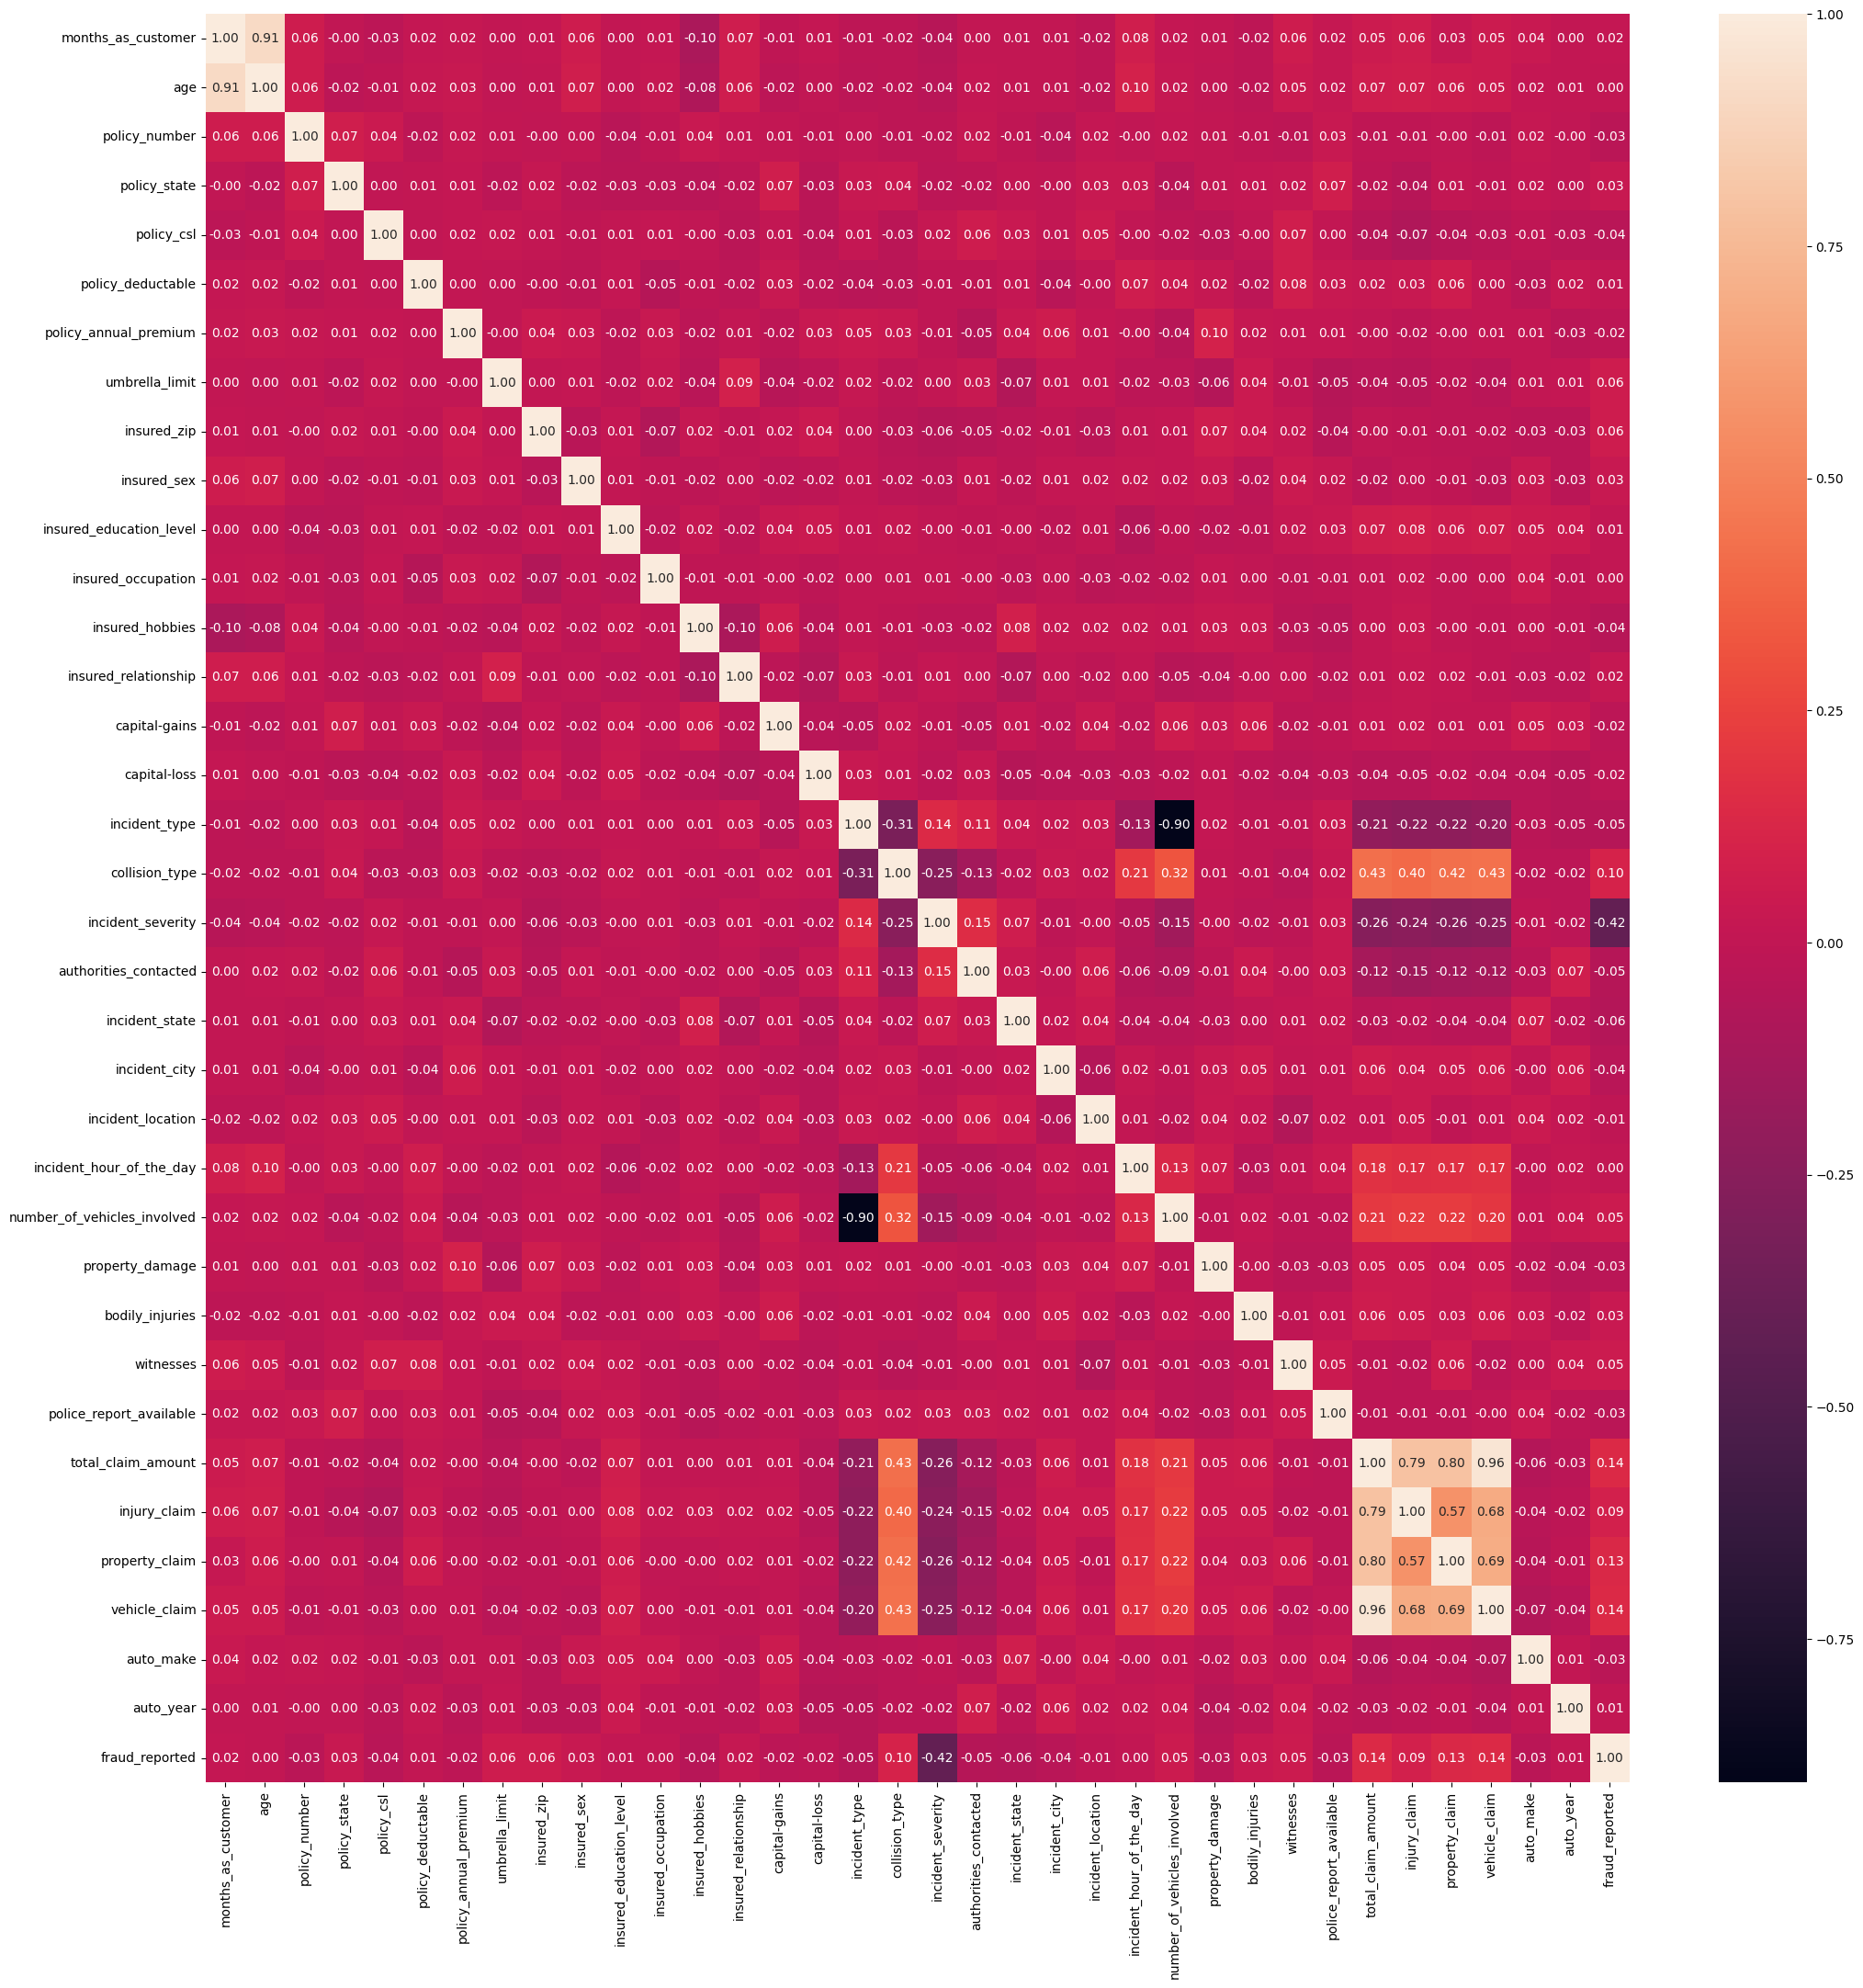

In [50]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt='.2f')


In [53]:
drop_cols = ['incident_hour_of_the_day','age','policy_deductable','incident_location','policy_bind_date','incident_date']
data=data.drop(columns=drop_cols,axis=1)

In [54]:
data.duplicated().sum()

0

In [55]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [56]:
def evaluation_fn(best_model,X_test_scaled,Y_test):
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    print('=================================================================================')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)    

    # ROC curve and AUC
    print('=================================================================================')
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    print('=================================================================================')


Accuracy of the model is: 0.8
Precision of the model is: 0.8074551971326165
Recall of the model is: 0.8
F1 score of the model is: 0.8033772774403792


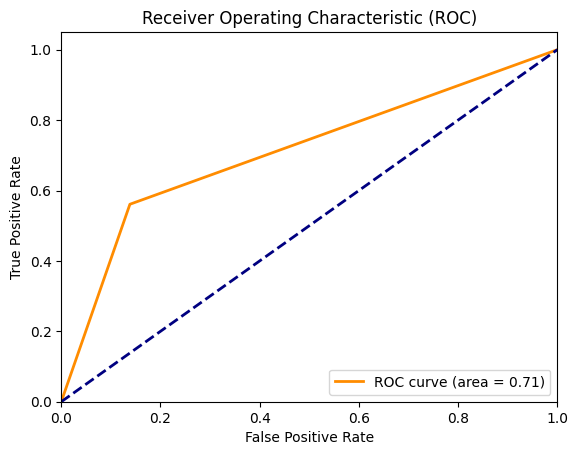

In [57]:
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.765
Precision of the model is: 0.7501045357902197
Recall of the model is: 0.765
F1 score of the model is: 0.7565641025641026


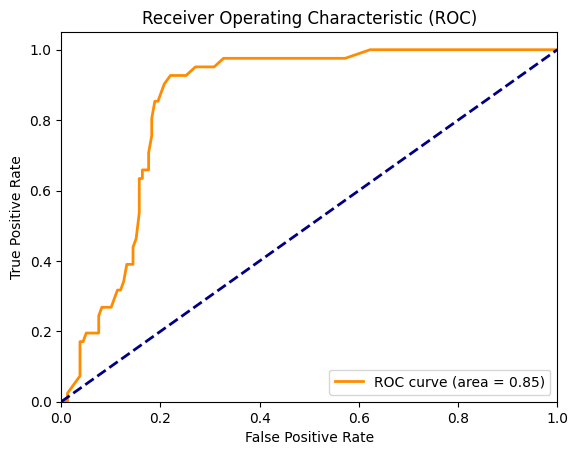

In [58]:
model = RandomForestClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is: 0.835
Precision of the model is: 0.8714166666666665
Recall of the model is: 0.835
F1 score of the model is: 0.84527732706381


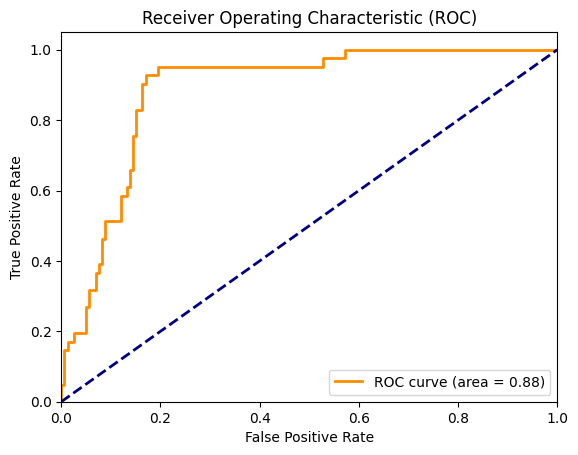

In [59]:
model = XGBRFClassifier(random_state=17)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Random Forest Classifier:
Accuracy of the model is: 0.85
Precision of the model is: 0.878364617838302
Recall of the model is: 0.85
F1 score of the model is: 0.8582713880254089


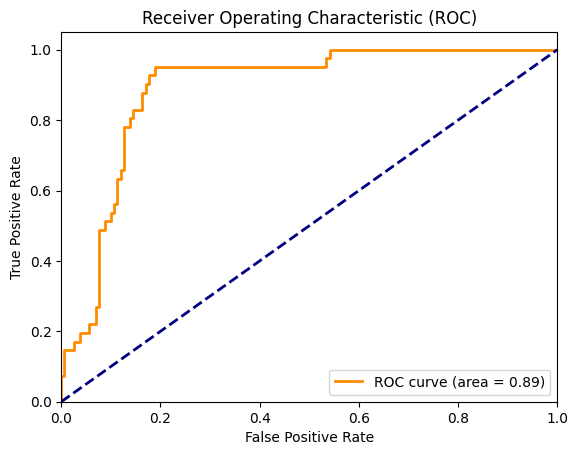

In [61]:
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)